In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
import csv

H_Fe = []
B_Fe = []

csv.register_dialect('myDialect', delimiter = ';')
with open('BH_S235JR.csv', 'r') as csvFile:
    reader = csv.reader(csvFile, dialect='myDialect')
    for row in reader:
        H_Fe.append((row[0]))
        B_Fe.append((row[1]))
csvFile.close()

In [63]:

alpha_mag = (45*pi/180)/3
R_gap = 220
R_o = 170
R_1 = 30
B_sat = 1.826
N = 3
mu_rec = 1.1
mu_0 = 4*pi*10**-7
B_rem = 1.41
alpha_ar = (10*pi/180)
aux = np.arange(0,N)
K_disp = 0.5

In [64]:
aux = np.arange(0,N)
B_target = 1.3
B_gap = np.zeros(N)

B_gap[0] = B_target
B_gap[1] = B_target
B_gap[2] = B_target*0.7



#B_gap[0:np.int(N/2)] = B_target*(aux[np.int(0):np.int(N/2)])/N + B_target/2
#B_gap[np.int(N/2):np.int(N)] = B_target

In [65]:
B_r = B_gap*(3*alpha_mag/2)*(R_gap+R_o)/(R_o - R_1)
R_so = R_gap+(sum(B_gap)/B_sat)*(3*alpha_mag/2*(R_gap+R_o))/N
l_g = R_gap - R_o

In [66]:
for i in range(1,len(H_Fe)-1):
    if B_r[0] <np.float(B_Fe[i+1]) and B_r[0]>np.float(B_Fe[i]):
        H_r1 = np.float(H_Fe[i])
    if B_r[1] <np.float(B_Fe[i+1]) and B_r[0]>np.float(B_Fe[i]):
        H_r2 = np.float(H_Fe[i])
    if B_r[2] <np.float(B_Fe[i+1]) and B_r[0]>np.float(B_Fe[i]):
        H_r3 = np.float(H_Fe[i])
    if B_sat <np.float(B_Fe[i+1]) and B_sat>np.float(B_Fe[i]):
        H_sat = np.float(H_Fe[i])

In [67]:
#B_gap = 1.3
#H_r1 = 1000
#H_r2 = 1000
#H_r3 = 1000

H_g = B_gap/mu_0
H_c = H_sat
H_d = H_sat
H_p = H_sat

In [68]:
alpha_r = pi/2 - 3*alpha_mag/(2*N) - 3*alpha_mag/N*aux
R_r = R_1 + (R_o-R_1)/(2*N) + (R_o-R_1)/N*aux
l_r = 2*R_r*alpha_r + 2*(R_o - R_r)

In [69]:
def equations(X):
    R_c1, R_c2, R_c3, R_s1, R_s2, R_s3, alpha_dente, H_m1, H_m2, H_m3, l_c1,l_c2,l_c3,R_r1,R_r2,R_r3,alpha_r1,alpha_r2,alpha_r3,l_p1,l_p2,l_p3,R_p1,R_p2,R_p3,alpha_0,H_a,H_b = X
    
    return(
           R_c1 - R_s1 -B_gap[0]/B_sat*(3*alpha_mag/2*(R_gap+R_o))/N,
           R_c2 - R_s2 -(B_gap[0]+B_gap[1])/B_sat*(3*alpha_mag/2*(R_gap+R_o))/N,
           B_sat*(R_c3 - R_s3) + mu_0*H_a*(R_s3-R_so)*K_disp -(B_gap[0]+B_gap[1]+B_gap[2])*(3*alpha_mag/2*(R_gap+R_o))/N - mu_0*H_b*(R_so-R_gap),       
           
           B_sat*(R_so-R_gap) + mu_0*H_b*(R_so-R_gap) - B_sat*alpha_dente*(R_so+R_s3)/2,   
        
           H_m1-1/(mu_rec*mu_0)*(B_gap[0]*(R_gap+R_o)/(R_s1+R_gap) - B_rem),
           H_m2-1/(mu_rec*mu_0)*(B_gap[1]*(R_gap+R_o)/(R_s2+R_gap) - B_rem),
           3*alpha_mag/N*(R_s3+R_gap)/2*(mu_rec*mu_0*H_m3+B_rem)- 3*alpha_mag/N*B_gap[2]*(R_gap+R_o)/2 - mu_0*H_b*(R_so-R_gap),
           
           H_r1*l_r[0] + 2*H_g[0]*l_g + 2*H_m1*(R_s1 - R_gap) + 2*H_c*l_c1 + 2*H_d*(R_s1 - R_so) + H_p*l_p1,
           H_r2*l_r[1] + 2*H_g[1]*l_g + 2*H_m2*(R_s2 - R_gap) + 2*H_c*l_c2 + 2*H_d*(R_s2 - R_so) + H_p*l_p2,
           H_r3*l_r[2] + 2*H_g[2]*l_g + 2*H_m3*(R_s3 - R_gap) + 2*H_c*l_c3 + 2*H_d*(R_s3 - R_so) + H_p*l_p3,
           H_a*alpha_ar*R_s3 + H_d*(R_s1 - R_so) + H_m3*(R_s3 - R_gap) + H_b*alpha_ar*(R_gap+R_so)/2,
        
           H_a*(R_s3-R_so)*K_disp - H_b*(R_so-R_gap),
        
        
           l_c1 - 2*(R_r1 - R_s1) - R_r1*alpha_r1,
           l_c2 - 2*(R_r2 - R_s2) - R_r2*alpha_r2,
           l_c3 - 2*(R_r3 - R_s3) - R_r3*alpha_r3,
        
        
           R_r1 - R_c1 + (R_c1 - R_s1)/(2*N) + (R_c1-R_s1)/N*0,
           R_r2 - R_c2 + (R_c2 - R_s2)/(2*N) + (R_c2-R_s3)/N*1,
           R_r3 - R_c3 + (R_c3 - R_s3)/(2*N) + (R_c2-R_s3)/N*2,
        
        
           alpha_r1 - ((alpha_dente)/2 + alpha_ar + 3*alpha_mag) + 3*alpha_mag/(2*N) + 3*alpha_mag/N*0,
           alpha_r2 - ((alpha_dente)/2 + alpha_ar + 3*alpha_mag) + 3*alpha_mag/(2*N) + 3*alpha_mag/N*1,
           alpha_r3 - ((alpha_dente)/2 + alpha_ar + 3*alpha_mag) + 3*alpha_mag/(2*N) + 3*alpha_mag/N*2,
        
        
           l_p1 - 2*(R_so-R_p1) - 2*(alpha_0 + (alpha_dente)/2)*R_p1,
           l_p2 - 2*(R_so-R_p2) - 2*(alpha_0 + (alpha_dente)/2)*R_p2,
           l_p3 - 2*(R_so-R_p3) - 2*(alpha_0 + (alpha_dente)/2)*R_p3,
        
        
           R_p1 - R_so + (R_so-R_gap)/(2*N) + (R_so-R_gap)/(N)*0,
           R_p2 - R_so + (R_so-R_gap)/(2*N) + (R_so-R_gap)/(N)*1,
           R_p3 - R_so + (R_so-R_gap)/(2*N) + (R_so-R_gap)/(N)*2,
        
           pi/2 - 3*alpha_mag-alpha_ar-alpha_dente - alpha_0
          )

In [70]:
R_c1, R_c2, R_c3, R_s1, R_s2, R_s3, alpha_dente, H_m1, H_m2, H_m3, l_c1,l_c2,l_c3,R_r1,R_r2,R_r3,alpha_r1,alpha_r2,alpha_r3,l_p1,l_p2,l_p3,R_p1,R_p2,R_p3,alpha_0,H_a,H_b = fsolve(equations,(2*R_gap, 2*R_gap, 2*R_gap, 2*R_gap, 2*R_gap, 2*R_gap, 0.1, -H_g[1], -H_g[0], -H_g[0], R_gap,R_gap,R_gap,R_gap,R_gap,R_gap,0.1,0.1,0.1,R_gap,R_gap,R_gap,R_gap,R_gap,R_gap,0.1,H_g[1],H_g[1]),maxfev = 100000)

In [71]:
alpha_0*180/pi,alpha_dente*180/pi

(20.728285856295944, 14.271714143704058)

In [72]:
R_cf = [R_c1, R_c2, R_c3]
R_sf = [R_s1, R_s2, R_s3]

In [73]:
R_so

318.1317584770689

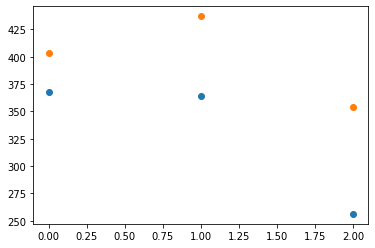

In [74]:
plt.plot(aux,R_sf,'o')
plt.plot(aux,R_cf,'o')

In [310]:
l_cf = [l_c1,l_c2,l_c3]
R_rf = [R_r1,R_r2,R_r3]
alpha_rf = [alpha_r1,alpha_r2,alpha_r3]
l_pf = [l_p1,l_p2,l_p3]
R_pf = [R_p1,R_p2,R_p3]

In [311]:
np.array(alpha_rf)*180/pi,l_pf,R_pf,R_so,R_rf,R_cf

(array([51.63928103, 36.63928103, 21.63928103]),
 [373.15841558205403, 407.1805658019709, 441.2027160218879],
 [312.17520112095053, 275.30512067257035, 238.43504022419012],
 330.61024134514065,
 [395.7945929571975, 400.47195012150377, 405.06332322567084],
 [401.9396063652609, 437.7304406458581, 473.43529086631605])

In [273]:
R_c1, R_c2, R_c3, R_s1, R_s2, R_s3, alpha_dente, H_m1, H_m2, H_m3, l_c1,l_c2,l_c3,R_r1,R_r2,R_r3,alpha_r1,alpha_r2,alpha_r3,l_p1,l_p2,l_p3,R_p1,R_p2,R_p3,alpha_0

(403.38726405555633,
 438.6170249073205,
 473.57970734648575,
 366.5171836071761,
 364.8768640105601,
 362.9694660013451,
 0.31895466418370794,
 -394686.31669810927,
 -392932.48183191154,
 -390880.67493485013,
 419.4616394221842,
 328.9562265578707,
 236.32420484178377,
 397.242250647493,
 401.11114512253533,
 404.7129611849787,
 0.9012422641894442,
 0.6394428763902947,
 0.3776434885911452,
 373.17915227948083,
 339.15945122292624,
 305.1397501663715,
 312.17520112095053,
 349.04528156933077,
 385.915362017711,
 0.37917703661402385)

In [215]:
def equations(X):
    R_c,R_s,alpha_dente,H_m,l_c,R_r,alpha_r,l_p,R_p,alpha_0 = X
    return(
           (R_c - R_c_i) - R_s-B_gap[i]/B_sat*(3*alpha_mag/2*(R_gap+R_o))/N,
           (alpha_dente -alpha_dente_i)- 2*(R_c - R_c_i-R_s)/(R_s+R_so[i])/N,
           H_m-1/(mu_rec*mu_0)*(B_gap[i]*(R_gap+R_o)/(R_s+R_gap) - B_rem),
           l_c - 2*(R_r - R_s) - R_r*alpha_r,
           R_r - (R_c - R_c_i) + ((R_c - R_c_i) - R_s)/(2*N) + ((R_c - R_c_i)-R_s)/N*i,
           alpha_r - ((alpha_dente -alpha_dente_i)/2 + alpha_ar + 3*alpha_mag) + 3*alpha_mag/(2*N) + 3*alpha_mag/N*i,
           H_r*l_r[i] + 2*H_g[i]*l_g + 2*H_m*(R_s - R_gap) + 2*H_c*l_c + 2*H_d*(R_s - R_so[i]) + H_p*l_p,
           l_p - 2*(R_so[i]-R_p) - 2*(alpha_0 + (alpha_dente -alpha_dente_i)/2)*R_p,
           R_p - R_so[i] + (R_so[i]-R_gap)/(2*N) - (R_so[i]-R_gap)/(N)*i,
           pi/2 - 3*alpha_mag-alpha_ar-(alpha_dente -alpha_dente_i) - alpha_0
          )

In [216]:
R_c = np.zeros(N)
R_s = np.zeros(N)
alpha_dente = np.zeros(N)
H_m = np.zeros(N)
l_c = np.zeros(N)
R_r = np.zeros(N)
alpha_r = np.zeros(N)
l_p = np.zeros(N)
R_p = np.zeros(N)
alpha_0 = np.zeros(N)

R_c_i = 0
alpha_dente_i = 0
for i in range(N):
    #B_gap = B_gp[N-1]
    #H_g = B_gap/mu_0
    R_c[i],R_s[i],alpha_dente[i],H_m[i],l_c[i],R_r[i],alpha_r[i],l_p[i],R_p[i],alpha_0[i] = fsolve(equations,(450,400,1,10000,100,425,1,100,100,0.5),maxfev = 1000000000)
    R_c_i = R_c[i] - R_s[i]
    alpha_dente_i = alpha_dente[i]

In [217]:
for i in range(N-1):
    R_c[i+1] = R_c[i+1] + (R_c[i] - R_s[i])

In [218]:
pi/2 - 3*alpha_mag-alpha_ar-alpha_dente - alpha_0

array([ 0.        ,  2.65696361, 14.14376447,  9.60396512,  9.60224001,
        9.60048563,  9.59869971,  9.59687995,  8.70554633,  8.31509845,
        8.31418705,  8.31324882,  8.31231019,  8.31137113,  8.31043166,
        8.30949175,  8.3085514 ,  8.3076106 ,  8.30666935,  8.30572763])

In [219]:
R_c - R_s-B_gap[i]/B_sat*(3*alpha_mag/2*(R_gap+R_o))/N

array([ -2.76525603, -16.03493331, -33.84408455, -48.05840294,
       -58.40136289, -64.59643878, -66.36710503, -63.43683601,
       -53.59247231, -38.49412215, -17.86525992,   8.29411437,
        39.98400073,  77.20439916, 119.95530966, 168.23673223,
       222.04866686, 281.39111356, 346.26407233, 416.66754316])

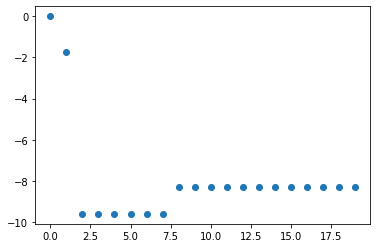

In [220]:
plt.plot(alpha_dente,'o')

In [370]:
0.33*180/pi

18.90760723931717

In [371]:
R_c - R_s-B_gap/B_sat*(3*alpha_mag/2*(R_gap+R_o))

array([-66.79139916, 176.78970734, 234.17074284, 243.97685609,
       252.40462137, 239.57041638, 235.72624414, 231.15827666,
       236.19422695, 304.95908819, 311.36913324, 315.29467179,
       321.28675141, 139.29146963, 169.19159801, 174.58030208,
       179.96900614, 185.03810537, 190.42680943, 195.8155135 ])

In [372]:
B_gap/B_sat*3*alpha_mag/2*(R_gap+R_o)

107.77408131064983

In [333]:
B_gap/B_sat*3*alpha_mag*(R_gap + R_o)/2

113.7705339550018

473